In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/CreditScoring.csv')
len(df)

4455

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


We can see that the DataFrame has the following columns:
- **status**: whether the customer managed to pay back the loan (1) or not (2)
- **seniority**: job experience in years
- **home**: type of homeownership: renting (1), a homeowner (2), and others
- **time**: period planned for the loan (in months)
- **age**: age of the client
- **marital [status]**: single (1), married (2), and others
- **records**: whether the client has any previous records: no (1), yes (2) (It’s not clear from the dataset description what kind of records we have in this column. For the purposes of this project, we may assume that it’s about records in the bank’s database.)
- **job**: type of job: full-time (1), part-time (2), and others
- **expenses**: how much the client spends per month
- **income**: how much the client earns per month
- **assets**: total worth of all the assets of the client
- **debt**: amount of credit debt
- **amount**: requested amount of the loan
- **price**: price of an item the client wants to buy


### Clean data

In [6]:
status_values = {
1: 'ok',
2: 'default',
0: 'unk'
}
home_values = {
1: 'rent',
2: 'owner',
3: 'private',
4: 'ignore',
5: 'parents',
6: 'other',
0: 'unk'
}

marital_values = {
1: 'single',
2: 'married',
3: 'widow',
4: 'separated',
5: 'divorced',
0: 'unk'
}

records_values = {
1: 'no',
2: 'yes',
0: 'unk'
}

job_values = {
1: 'fixed',
2: 'parttime',
3: 'freelance',
4: 'others',
0: 'unk'
}

In [7]:
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [12]:
df_b = df.copy()

### EDA Exploratory data analysis

In [13]:
df.shape

(4455, 14)

In [14]:
## missing data
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

There are missing data in the dataset. We have observed instances where certain fields do not contain any values

### Target

In [15]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [16]:
df = df[df.status !='unk']

In [17]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [18]:
df.status.value_counts(normalize=True)*100

status
ok         71.845532
default    28.154468
Name: proportion, dtype: float64

<Axes: xlabel='status', ylabel='count'>

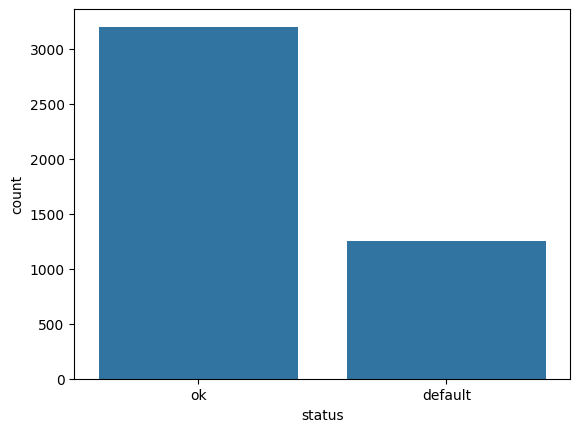

In [19]:
sns.countplot(data=df, x='status')

the dataset is imbalanced

### Feature importance analysis

In [20]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [21]:
df.dtypes.value_counts()

int64      6
object     5
float64    3
Name: count, dtype: int64

In [22]:
categorical = df.select_dtypes('object').columns
numerical = df.select_dtypes(exclude='object').columns
print('categorical is: ', categorical)
print('numerical is: ', numerical)

categorical is:  Index(['status', 'home', 'marital', 'records', 'job'], dtype='object')
numerical is:  Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price'],
      dtype='object')


#### Categorical

In [23]:
status_values = {
'ok':1,
'default':0}
df.status = df.status.map(status_values)

#### rate risk

In [24]:
df_group = df.groupby(by='job').status.agg(['mean'])
df_group

,mean
job,
fixed,0.793226
freelance,0.674805
others,0.602339
parttime,0.400442
unk,0.000000


In [25]:
global_mean  = df.status.mean()
global_mean

0.7184553210597217

In [26]:
from IPython.display import display
for col in categorical:
    df_group = df.groupby(by=col).status.agg(['mean'])
    df_group
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean']/ global_mean
    display(df_group)
    

,mean,diff,risk
status,,,
0,0.0,-0.718455,0.000000
1,1.0,0.281545,1.391875


,mean,diff,risk
home,,,
ignore,0.550000,-0.168455,0.765531
other,0.542320,-0.176136,0.754841
owner,0.814903,0.096447,1.134243
parents,0.702427,-0.016029,0.977690
private,0.658537,-0.059919,0.916601
rent,0.601233,-0.117222,0.836842
unk,0.333333,-0.385122,0.463958


,mean,diff,risk
marital,,,
divorced,0.631579,-0.086876,0.879079
married,0.744215,0.025759,1.035854
separated,0.507692,-0.210763,0.706644
single,0.664278,-0.054177,0.924593
unk,1.000000,0.281545,1.391875
widow,0.716418,-0.002037,0.997164


,mean,diff,risk
records,,,
no,0.775876,0.057421,1.079923
yes,0.445019,-0.273436,0.619411


,mean,diff,risk
job,,,
fixed,0.793226,0.074771,1.104072
freelance,0.674805,-0.043651,0.939244
others,0.602339,-0.116116,0.838381
parttime,0.400442,-0.318013,0.557366
unk,0.000000,-0.718455,0.000000


### Dataset preparation

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train_full, df_test = train_test_split(df_b , test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25,random_state=42)

In [29]:
## to check the size of our dataset

len(df_train), len(df_val), len(df_test)

(2673, 891, 891)

In [30]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [31]:
del df_train['status']
del df_val['status']

In [32]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [33]:
df_train.isnull().sum()

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [34]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')
dict_train

[{'seniority': 14,
  'home': 'owner',
  'time': 60,
  'age': 30,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 60,
  'income': 70.0,
  'assets': 4000.0,
  'debt': 2800.0,
  'amount': 600,
  'price': 1125},
 {'seniority': 2,
  'home': 'parents',
  'time': 60,
  'age': 35,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 104.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1200,
  'price': 1677},
 {'seniority': 8,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'single',
  'records': 'no',
  'job': 'fixed',
  'expenses': 42,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 325,
  'price': 450},
 {'seniority': 14,
  'home': 'owner',
  'time': 60,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 45,
  'income': 91.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1565},
 {'seniority': 2,
  'home': 'other',
  'time': 60,
  'age': 41,
  'marital': '

In [35]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

### Decision trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
dt.predict_proba(X_train)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
y_pred_train = dt.predict_proba(X_train)[:,1]
auc_score = roc_auc_score(y_train, y_pred_train)

print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.9999996450431698


In [41]:
y_pred_val = dt.predict_proba(X_val)[:,1]
auc_score =roc_auc_score(y_val, y_pred_val)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.6522761346599428


the model cannot generalize.

In [42]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
from sklearn.tree import export_text

tree_text = export_text(dt,feature_names = dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [44]:
y_pred_train = dt.predict_proba(X_train)[:,1]
auc_score = roc_auc_score(y_train, y_pred_train)

print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.6989678565292888


In [45]:
y_pred_val = dt.predict_proba(X_val)[:,1]
auc_score =roc_auc_score(y_val, y_pred_val)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.6701804056649362


### Decision tree learning algorithm

#### Parameter tuning for decision tree

In [46]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print('%4s -> %.3f' % (depth,auc))

   1 -> 0.599
   2 -> 0.670
   3 -> 0.738
   4 -> 0.736
   5 -> 0.754
   6 -> 0.756
  10 -> 0.652
  15 -> 0.676
  20 -> 0.669
None -> 0.659


In [47]:
for m in [4,5,6]:
    print('depth: %s' % m)
    
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        print('%4s -> %.3f' % (s,auc))
    
    
    
    

depth: 4
   1 -> 0.736
   5 -> 0.743
  10 -> 0.743
  15 -> 0.740
  20 -> 0.740
  50 -> 0.752
 100 -> 0.750
 200 -> 0.751
depth: 5
   1 -> 0.754
   5 -> 0.755
  10 -> 0.760
  15 -> 0.754
  20 -> 0.759
  50 -> 0.762
 100 -> 0.763
 200 -> 0.763
depth: 6
   1 -> 0.756
   5 -> 0.759
  10 -> 0.762
  15 -> 0.760
  20 -> 0.762
  50 -> 0.771
 100 -> 0.768
 200 -> 0.763


we see that the best AUC is 76.8% with parameters min_sample_
leaf=50 and max_depth=6 

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [50]:
y_pred = rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

0.9989393889915108

In [51]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7744898212050999

In [52]:
aucs = []

for i in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=i,random_state=42)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)
    
    
    
    

10 -> 0.774
20 -> 0.785
30 -> 0.794
40 -> 0.800
50 -> 0.801
60 -> 0.801
70 -> 0.803
80 -> 0.803
90 -> 0.804
100 -> 0.805
110 -> 0.806
120 -> 0.806
130 -> 0.806
140 -> 0.806
150 -> 0.806
160 -> 0.806
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807


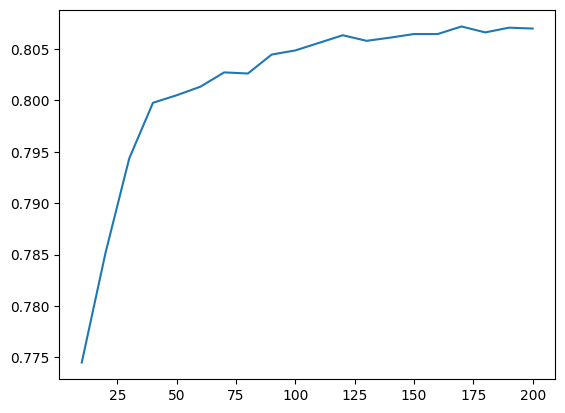

In [53]:
plt.plot(range(10,201,10), aucs)

### Parameter tuning for random forest

In [54]:
all_aucs = {}

for depth in [5,10,20]:
    print('depth: %s' % depth)
    aucs = []
    
    for i in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    all_aucs[depth] = aucs

depth: 5
10 -> 0.795
20 -> 0.801
30 -> 0.800
40 -> 0.799
50 -> 0.797
60 -> 0.798
70 -> 0.802
80 -> 0.800
90 -> 0.800
100 -> 0.800
110 -> 0.800
120 -> 0.801
130 -> 0.801
140 -> 0.801
150 -> 0.802
160 -> 0.802
170 -> 0.803
180 -> 0.803
190 -> 0.803
200 -> 0.803
depth: 10
10 -> 0.790
20 -> 0.796
30 -> 0.801
40 -> 0.807
50 -> 0.807
60 -> 0.809
70 -> 0.809
80 -> 0.809
90 -> 0.809
100 -> 0.810
110 -> 0.810
120 -> 0.811
130 -> 0.811
140 -> 0.810
150 -> 0.810
160 -> 0.810
170 -> 0.810
180 -> 0.810
190 -> 0.811
200 -> 0.811
depth: 20
10 -> 0.760
20 -> 0.781
30 -> 0.792
40 -> 0.799
50 -> 0.797
60 -> 0.799
70 -> 0.801
80 -> 0.802
90 -> 0.804
100 -> 0.806
110 -> 0.806
120 -> 0.807
130 -> 0.808
140 -> 0.808
150 -> 0.808
160 -> 0.809
170 -> 0.809
180 -> 0.809
190 -> 0.809
200 -> 0.808


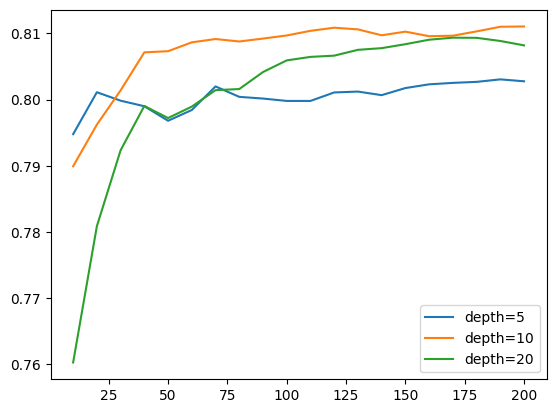

In [55]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()


In [56]:
all_aucs = {}
for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []
    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10,
        min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.799
30 -> 0.805
50 -> 0.806
70 -> 0.810
90 -> 0.811
110 -> 0.812
130 -> 0.812
150 -> 0.812
170 -> 0.812
190 -> 0.813

min_samples_leaf: 5
10 -> 0.804
30 -> 0.809
50 -> 0.807
70 -> 0.810
90 -> 0.812
110 -> 0.814
130 -> 0.814
150 -> 0.814
170 -> 0.813
190 -> 0.813

min_samples_leaf: 10
10 -> 0.798
30 -> 0.811
50 -> 0.810
70 -> 0.812
90 -> 0.813
110 -> 0.814
130 -> 0.814
150 -> 0.813
170 -> 0.814
190 -> 0.813



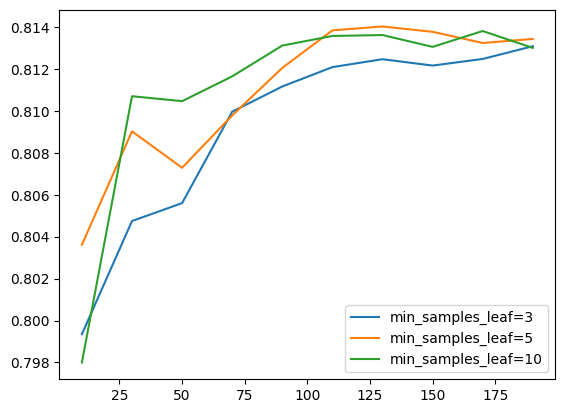

In [57]:
num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()

Thus, the best parameters for random forest for our problem are
- max_depth=10
- min_samples_leaf=5

## Gradient boosting

### XGBoost: Extreme gradient boosting algorithm

In [58]:
import xgboost as xgb

In [59]:
df_train = xgb.DMatrix(X_train,label = y_train, feature_names=dv.feature_names_)

In [60]:
dval = xgb.DMatrix(X_val,label = y_val,feature_names=dv.feature_names_)

In [62]:
xgb_params = {
'eta': 0.3,
'max_depth': 6,
'min_child_weight': 1,
'objective': 'binary:logistic',
'nthread': 8,
'seed': 1,
'silent': 1
}

In [63]:
model = xgb.train(xgb_params,df_train,num_boost_round=10)

/home/joseph/Documents/personal/data-analisis/bootcamp/ML-Bookcamp-projects/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:04:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [64]:
y_perd = model.predict(dval)

In [65]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.10231313, 0.09358834, 0.15133281, 0.15356785, 0.2556903 ,
       0.10254478, 0.04351001, 0.78100747, 0.26327857, 0.18201782],
      dtype=float32)

In [66]:
roc_auc_score(y_val, y_pred)

0.803684934392308

### Model performance monitoring

In [70]:
watchlist = [(df_train,'train'),(dval,'val')]

In [67]:
xgb_params = {
'eta': 0.3,
'max_depth': 6,
'min_child_weight': 1,
'objective': 'binary:logistic',
'eval_metric': 'auc',
'nthread': 8,
'seed': 1,
'silent': 1
}

In [71]:
model = xgb.train(xgb_params, df_train, num_boost_round=100, evals=watchlist, verbose_eval=10)

[0]	train-auc:0.87076	val-auc:0.72642
[10]	train-auc:0.95086	val-auc:0.80123
[20]	train-auc:0.97419	val-auc:0.79581
[30]	train-auc:0.98802	val-auc:0.79173
[40]	train-auc:0.99422	val-auc:0.79069
[50]	train-auc:0.99745	val-auc:0.78971
[60]	train-auc:0.99892	val-auc:0.79187
[70]	train-auc:0.99954	val-auc:0.79071
[80]	train-auc:0.99983	val-auc:0.78929
[90]	train-auc:0.99994	val-auc:0.78989
[99]	train-auc:0.99999	val-auc:0.78888


/home/joseph/Documents/personal/data-analisis/bootcamp/ML-Bookcamp-projects/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:12:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


### Parameter tuning for XGBoost

In [86]:
xgb_params = {
'eta': 0.1,
'max_depth': 3,
'min_child_weight': 1,
'objective': 'binary:logistic',
'eval_metric': 'auc',
'nthread': 8,
'seed': 1,
'silent': 1
}

In [87]:
model = xgb.train(xgb_params, df_train, num_boost_round=100, evals=watchlist, verbose_eval=10)

[0]	train-auc:0.77547	val-auc:0.73032
[10]	train-auc:0.85386	val-auc:0.79263
[20]	train-auc:0.87119	val-auc:0.80211
[30]	train-auc:0.88091	val-auc:0.80999
[40]	train-auc:0.88783	val-auc:0.81317
[50]	train-auc:0.89490	val-auc:0.81655
[60]	train-auc:0.90048	val-auc:0.81814
[70]	train-auc:0.90517	val-auc:0.82186
[80]	train-auc:0.90906	val-auc:0.82247
[90]	train-auc:0.91242	val-auc:0.82256
[99]	train-auc:0.91532	val-auc:0.82252


/home/joseph/Documents/personal/data-analisis/bootcamp/ML-Bookcamp-projects/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [88]:
y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

In [89]:
del df_train_full['status']
del df_test['status']

In [90]:
dict_train = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [91]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)
xgb_params = {
'eta': 0.1,
'max_depth': 3,
'min_child_weight': 1,
'objective': 'binary:logistic',
'eval_metric': 'auc',
'nthread': 8,
'seed': 1,
'silent': 1
}
num_trees = 160
model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

/home/joseph/Documents/personal/data-analisis/bootcamp/ML-Bookcamp-projects/env/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:30:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [92]:
y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test, y_pred_xgb)

0.8497434816220394